# Chocolate Bar Ratings

## Context
This project's aim is to explore and visualize the data provided by the dataset [Chocolate Bar Ratings](https://www.kaggle.com/datasets/rtatman/chocolate-bar-ratings/data) using different libraries. As stated in the description, this dataset contains expert ratings of over 1,700 individual chocolate bars, along with information on their regional origin, percentage of cocoa, the variety of chocolate bean used and where the beans were grown. For further context, please check the original dataset on Kaggle. As an initial data analysis project, I intend to update this notebook later with more data analysis techniques.
*As I use plotly for some graphs, I had to convert the output from dynamic to a static png in order to show the image on github.*



## Setup, loading and cleaning

### In this step, we'll be importing the necessary libraries, performing an initial check on the dataset and organizing/cleaning the dataframe.

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

# Data Loading
pd.set_option('display.max_columns', None)
df = pd.read_csv('C:/Users/danco/OneDrive/Desktop/Programação/Portfolio/flavors_of_cacao.csv')

df.head()
df.describe()
warnings.filterwarnings("ignore", message="^When grouping with a ")

# Correct the column names and copy the dataframe

df.columns = df.columns.str.strip().str.replace('\n', '_').str.replace(' ', '_')
df.rename(columns={"Company\xa0_(Maker-if_known)": "Company"}, inplace=True)
df.info()
ds = df.copy()

ds['Bean_Type'] = ds['Bean_Type'].replace(u'\xa0', np.nan)
ds['Broad_Bean_Origin'] = ds['Broad_Bean_Origin'].replace(u'\xa0', np.nan)

# Check for duplicates and missing values

ds.duplicated()

def misvalue_percent(df):

    mis_val = df.isnull().sum()

    mis_val_percent = 100 * mis_val / len(df)

    mis_val_dtype = df.dtypes

    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing values', 1: '% of Missing values', 2: 'Dtype'})

    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:, 0] != 0].sort_values(
        '% of Missing values', ascending=False).round(2)

    print("The dataset has " + str(df.shape[1]) + " columns.\n"
                                                  "Found: " + str(
        mis_val_table_ren_columns.shape[0]) + " columns with missing values.")

    if mis_val_table_ren_columns.shape[0] == 0:
        return

    return mis_val_table_ren_columns

print(misvalue_percent(ds))

ds['Bean_Type'] = ds['Bean_Type'].replace(np.nan, "Missing")
ds['Broad_Bean_Origin'] = ds['Broad_Bean_Origin'].replace(np.nan, "Missing")

# Verifying the highest rating values

best_rating = ds.loc[ds['Rating'] >= 4.5].sort_values(by='Broad_Bean_Origin', ascending=True)
value_counts = best_rating['Broad_Bean_Origin'].value_counts()

# Correcting all the different possible column values

columns_to_correct = ['Broad_Bean_Origin', 'Bean_Type', 'Company_Location']

corrections_inverted = {
    'Trinidad': 'Trinidad and Tobago', 'Tobago': 'Trinidad and Tobago', 'Trinidad-Tobago': 'Trinidad and Tobago',
    'Domincan Republic': 'Dominican Republic', 'Dominican Rep.': 'Dominican Republic', 'Dom. Rep.': 'Dominican Republic', 'Domin. Rep': 'Dominican Republic', 'D.R': 'Dominican Republic', 'DR': 'Dominican Republic',    'Mex': 'Mexico', 'Sao Tome': 'Sao Tome and Principe','Sao Tome & Principe':'Sao Tome and Principe','St. Lucia': 'Santa Lucia', 'Carribean': 'Caribbean','Brasil':'Brazil','C. Am.': 'Central America', 'Ven.': 'Venezuela', 'Cost Rica': 'Costa Rica', 'Ecuad.': 'Ecuador', 'Mad.': 'Madagascar', 'Mad': 'Madagascar', 'PNG': 'Papua New Guinea', 'S. America': 'South America', 'Guat.': 'Guatemala', 'Peru(SMartin' 'Pangoa' 'nacional)': 'Peru', 'Ghana & Madagascar': 'Ghana, Madagascar', 'Madagascar & Ecuador': 'Madagascar, Ecuador', 'Venezuela/ Ghana': 'Venezuela, Ghana','Carribean(DR/Jam/Tri)':'Caribbean', 'Niacragua':'Nicaragua', "Eucador":"Ecuador", "Dom. Rep":"Dominican Republic", "D.R.": "Dominican Republic", "Haw.":"Hawaii", "Gre.":"Grenada", "Nic.":"Nicaragua", "Ecu.":"Ecuador", "Central and S. America":"Central and South America","Principe":"Sao Tome and Principe", "nacional)":"Peru", "Pangoa":"Peru", "Peru(SMartin":"Peru", "Ven":"Venezuela", "Venez":"Venezuela"
}

for x in columns_to_correct:
    
    ds[x] = ds[x].replace(corrections_inverted)
    ds[x] = ds[x].str.split(',')
    ds = ds.explode(x).reset_index(drop=True)
    ds[x] = ds[x].str.strip()
    ds[x] = ds[x].replace(corrections_inverted)

# Checking for changes after exploding the dataframe

ds[ds['Specific_Bean_Origin_or_Bar_Name'] == 'Bayou Blend']
ds.drop_duplicates(inplace=True)

# Creating a new group of continents based on company location

for i in ds.index:
    x = ds.at[i, 'Company_Location']
    if x in ["France", "Switzerland", "Netherlands", "Spain", "Italy", "U.K.", "Wales", "Belgium", "Germany", "Russia", "Amsterdam", "Scotland", "Portugal", "Denmark", "Finland", "Sweden", "Poland", "Austria", "Czech Republic", "Lithuania", "Iceland", "Ireland", "Hungary"]:
        ds.at[i, "Continent"] = "Europe"
    elif x in ["U.S.A.", "Canada", "Brazil", "Peru", "Ecuador", "Mexico", "Puerto Rico", "Venezuela", "Colombia", "Costa Rica", "Martinique", "Argentina", "Guatemala", "Bolivia", "Santa Lucia", "Grenada", "Dominican Republic", "Honduras", "Nicaragua", "Chile", "Suriname"]:
        ds.at[i, "Continent"] = "America"
    elif x in ["Australia", "Fiji", "New Zealand"]:
        ds.at[i, "Continent"] = "Oceania"
    elif x in ["Japan", "South Korea", "Singapore", "Vietnam", "Israel", "India", "Philippines"]:
        ds.at[i, "Continent"] = "Asia"
    elif x in ["Sao Tome and Principe", "South Africa", "Madagascar", "Ghana"]:
        ds.at[i, "Continent"] = "Africa"

# Correcting data type after exploding

ds['REF'].isna().sum()
ds['Review_Date'].isna().sum()
ds.dropna(subset=['REF'], inplace=True)
ds.dropna(subset=['Review_Date'], inplace=True)
ds['REF'] = ds['REF'].astype(int)
ds['Review_Date'] = ds['Review_Date'].astype(int)

# Correcting spelling mistake inherent to database entry

n = 'Shattell'
ds.at[1542,'Company'] = n

# Creating a new group based on the range of Cocoa Percentage

ds['Cocoa_Percent'] = ds['Cocoa_Percent'].str.rstrip('%').astype(float)
bins = [0, 50, 70, 90, 100]
labels = ['(0, 50]', '(50, 70]', '(70, 90]', '(90, 100]']
ds['Cocoa_Percent_Range'] = pd.cut(ds['Cocoa_Percent'], bins=bins, labels=labels, include_lowest=True)
max_rating = ds['Rating'].max()
ds


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company                           1795 non-null   object 
 1   Specific_Bean_Origin_or_Bar_Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review_Date                       1795 non-null   int64  
 4   Cocoa_Percent                     1795 non-null   object 
 5   Company_Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean_Type                         1794 non-null   object 
 8   Broad_Bean_Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB
The dataset has 9 columns.
Found: 2 columns with missing values.
                   Missing values  % of Missing values   Dtype
Bean_Type

,Company,Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin,Continent,Cocoa_Percent_Range
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,Missing,Sao Tome and Principe,Europe,"(50, 70]"
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,Missing,Togo,Europe,"(50, 70]"
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,Missing,Togo,Europe,"(50, 70]"
3,A. Morin,Akata,1680,2015,70.0,France,3.50,Missing,Togo,Europe,"(50, 70]"
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,Missing,Peru,Europe,"(50, 70]"
...,...,...,...,...,...,...,...,...,...,...,...
1921,Zotter,Peru,647,2011,70.0,Austria,3.75,Missing,Peru,Europe,"(50, 70]"
1922,Zotter,Congo,749,2011,65.0,Austria,3.00,Forastero,Congo,Europe,"(50, 70]"
1923,Zotter,Kerala State,749,2011,65.0,Austria,3.50,Forastero,India,Europe,"(50, 70]"
1924,Zotter,Kerala State,781,2011,62.0,Austria,3.25,Missing,India,Europe,"(50, 70]"


After an initial verification, we can observe the considerable amount of missing values for Bean Types (49.47%), hence I'll not be using this column in our visualization and analysis.
2 new columns were created, one of them containing the range of cocoa percentages based on the minimum percent value and the other one, the continents where the companies are located.

# Data Visualization

## Now we'll perform a simple data exploration and visualization and check some questions.

* Where are the best cocoa beans grown?
* Which countries produce the highest rated bars?
* Which companies produce the highest rated bars?
* Is the cocoa percentage relevant to its rating?


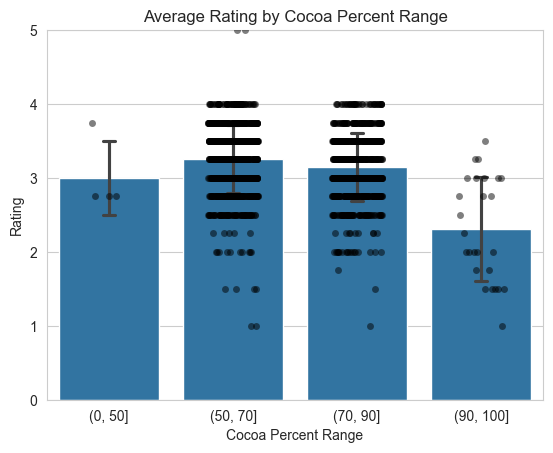

In [10]:
# Evaluating the distribution of ratings based on cocoa percent range

sns.barplot(data=ds, x='Cocoa_Percent_Range', y='Rating', order=labels, errorbar='sd', capsize=0.1)
sns.stripplot(data=ds, x='Cocoa_Percent_Range', y='Rating', order=labels, color='black', alpha=0.5,jitter=0.2)
plt.xlabel('Cocoa Percent Range')
plt.ylabel('Rating')
plt.title('Average Rating by Cocoa Percent Range')
plt.ylim(0, max_rating)
plt.show()

We can observe a majority of the entries are in the middle bins from 51 to 90, and with that in mind, the rating seems to be higher within that range.

## World distribution

Now we'll use the [choropleth map](https://plotly.com/python/choropleth-maps/) from plotly to visualize some averages in a world map.

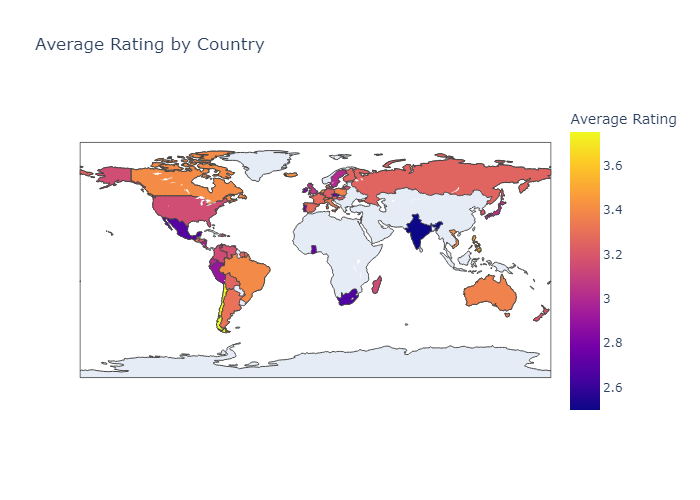

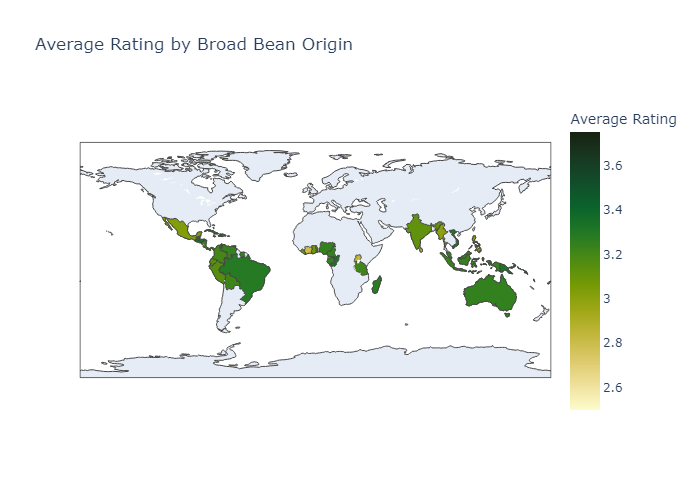

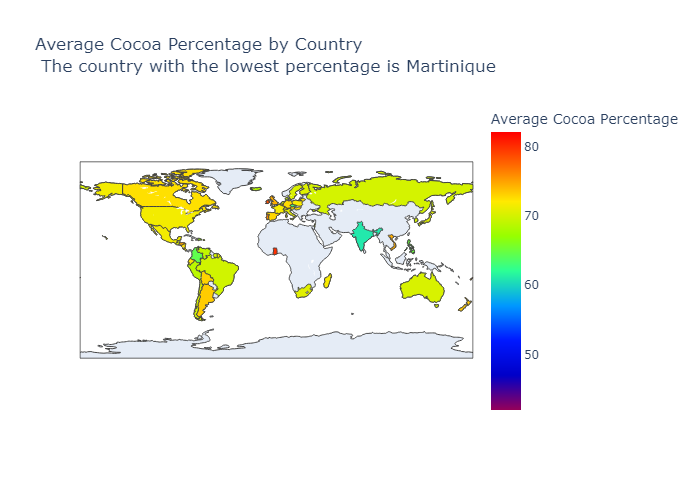

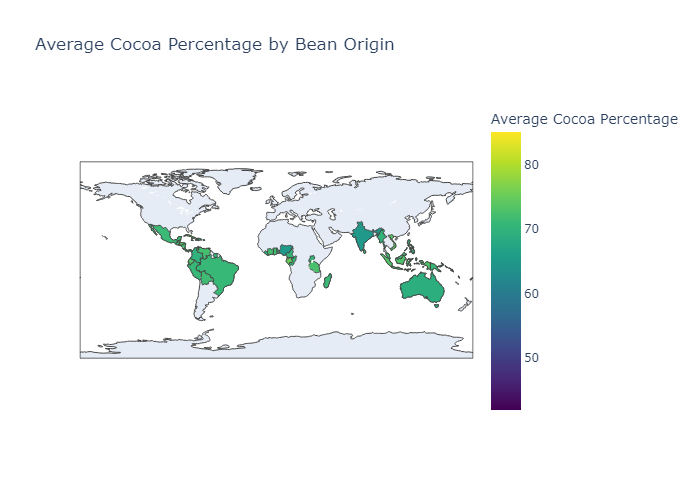

In [11]:
# Visualizing the distribution of averages using the world map

avg_rating_country = ds.groupby('Company_Location')['Rating'].mean().reset_index()

fig = px.choropleth(avg_rating_country,
                    locationmode="country names", 
                    locations='Company_Location',
                    color="Rating",
                    hover_name="Company_Location",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    labels={'Rating': 'Average Rating'},
                    title='Average Rating by Country')

avg_rating_BBO = ds.groupby('Broad_Bean_Origin')['Rating'].mean().reset_index()
                    
fig2 = px.choropleth(avg_rating_BBO,                    
                    locationmode="country names", 
                    locations='Broad_Bean_Origin',
                    color="Rating",
                    hover_name="Broad_Bean_Origin",
                    color_continuous_scale=px.colors.sequential.speed,
                    labels={'Rating': 'Average Rating'},
                    title='Average Rating by Broad Bean Origin')

avg_cocoa_country = ds.groupby('Company_Location')['Cocoa_Percent'].mean().reset_index()
lowest_percentage = ds.loc[ds['Cocoa_Percent'] == 42]

fig3 = px.choropleth(avg_cocoa_country,
                    locationmode="country names", 
                    locations='Company_Location',
                    color="Cocoa_Percent",
                    hover_name="Cocoa_Percent",
                    color_continuous_scale=px.colors.sequential.Rainbow,
                    labels={'Cocoa_Percent': 'Average Cocoa Percentage'},
                    title=f'Average Cocoa Percentage by Country <br> The country with the lowest percentage is {lowest_percentage.iloc[0]["Company_Location"]}')

avg_rating_cocoap = ds.groupby('Broad_Bean_Origin')['Cocoa_Percent'].mean().reset_index()

fig4 = px.choropleth(avg_rating_cocoap,
                    locationmode="country names", 
                    locations='Broad_Bean_Origin',
                    color="Cocoa_Percent",
                    hover_name="Broad_Bean_Origin",
                    color_continuous_scale=px.colors.sequential.Viridis,
                    labels={'Cocoa_Percent': 'Average Cocoa Percentage'},
                    title='Average Cocoa Percentage by Bean Origin')


fig.show('png')
fig2.show('png')
fig3.show('png')
fig4.show('png')

    We can see a higher rating average in american countries (company location) and based on the origin of the beans, there is a higher average in some countries from South America, Africa, Southeast Asia and Oceania.
    In regards to the Cocoa Percentage, there is apparently a higher average in countries located in Central Europe, the Americas, and more specifically in São Tomé and Príncipe and New Zealand. While according to bean origin, mainly some countries in Africa, India and Southeast Asia, possess the highest averages in cocoa percentage.

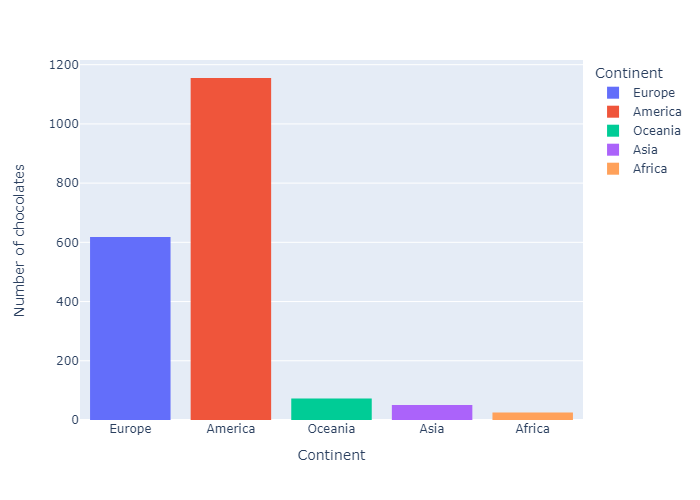

In [12]:
# Checking the distribution of chocolate bars per Continent

fig5 = px.histogram(ds, x="Continent", color='Continent')
fig5.update_yaxes(title_text='Number of chocolates')
fig5.show('png')

With the new column group of continents, the americas have a higher production number of chocolate bars, followed by European countries.

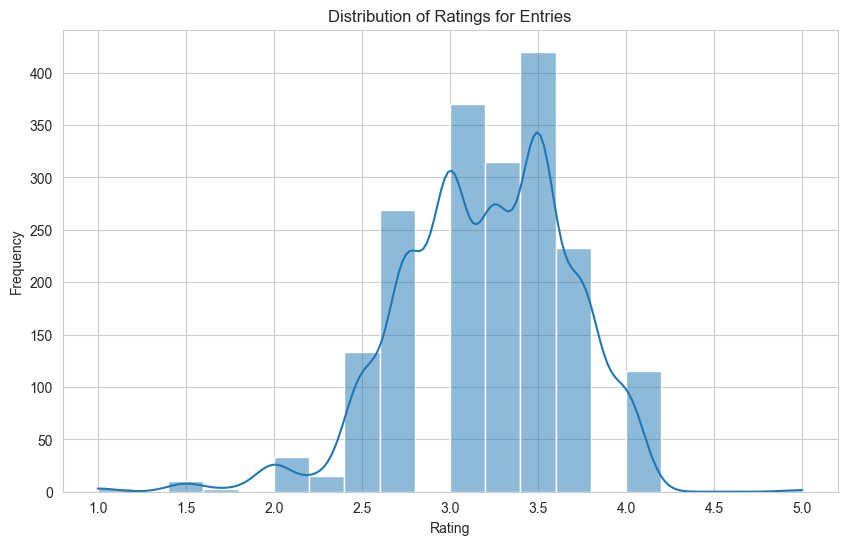

In [13]:
# Assessing the distribution of ratings

plt.figure(figsize=(10, 6))
sns.histplot(data=ds, x='Rating', bins=20, kde=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings for Entries')
plt.show()

The general assessment for the distribution of ratings shows us that most entries rank between 3.0 to 3.75.

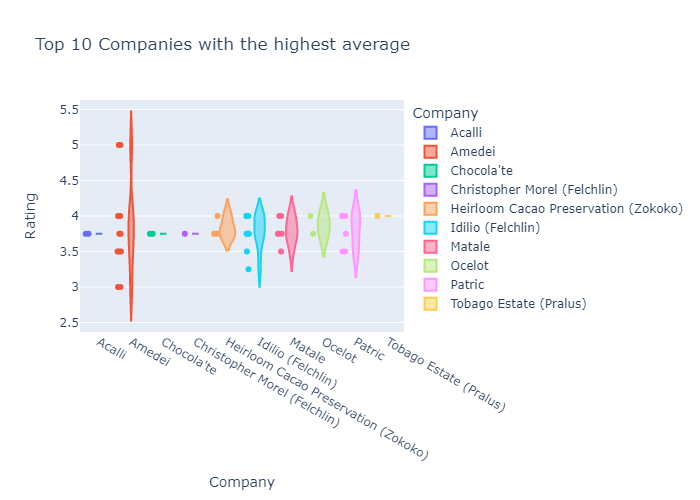

Company
Tobago Estate (Pralus)                  4.000000
Ocelot                                  3.875000
Amedei                                  3.846154
Heirloom Cacao Preservation (Zokoko)    3.833333
Matale                                  3.791667
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: Rating, dtype: float64

In [14]:
# Plotting the top 10 companies with the higher averages and their number of bars released

avg_rating_per_company = ds.groupby('Company')['Rating'].mean()
top_10 = avg_rating_per_company.nlargest(10).index
filtered = ds[ds['Company'].isin(top_10)]

fig6 = px.violin(filtered,
              x='Company', 
              y='Rating', 
              color='Company',
              title='Top 10 Companies with the highest average', 
              points='all')

fig6.show('png')
filtered.groupby('Company')['Rating'].mean().sort_values(ascending=False)

After identifying and filtering the top 10 companies with the highest average, while Amedei seems to be possess the only 2 bars rated 5 in the database, Tobago Estate possesses the highest average. However, we should keep in mind this company only has 1 evaluated chocolate bar.

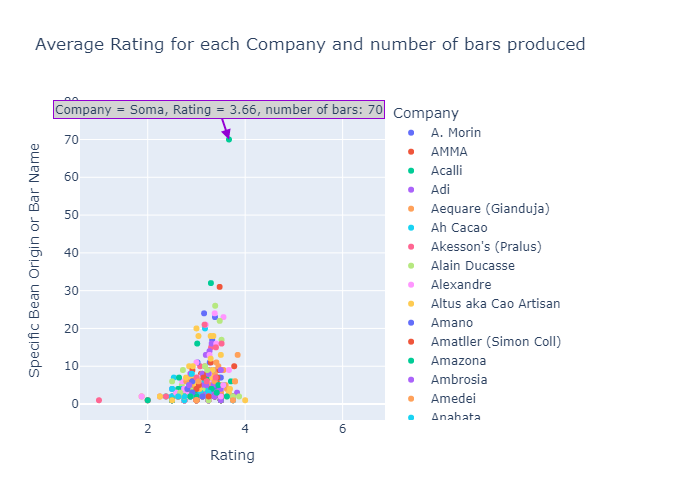

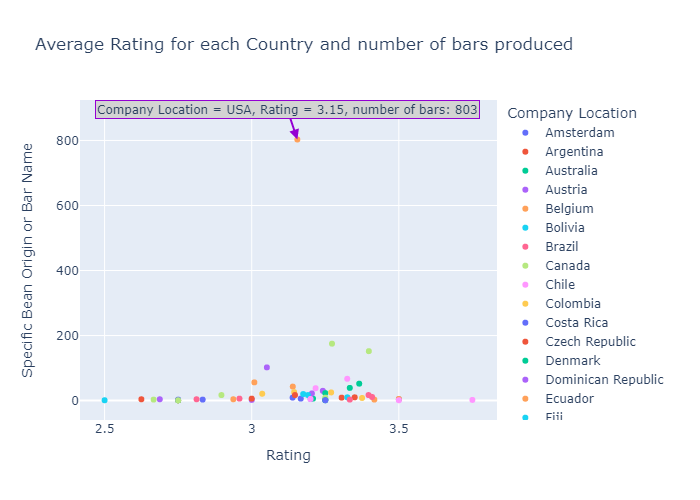

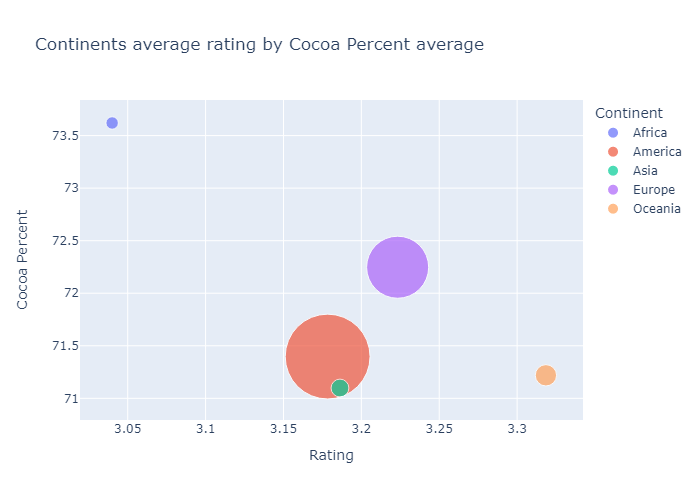

In [15]:
# Plotting the average rating against other variables

company_counts = ds.groupby('Company').agg({'Rating': 'mean', 'Specific_Bean_Origin_or_Bar_Name': 'count'}).reset_index()

fig7 = px.scatter(company_counts, x='Rating',
                  y='Specific_Bean_Origin_or_Bar_Name',
                  color='Company',
                  title='Average Rating for each Company and number of bars produced',
                  labels = {'Specific_Bean_Origin_or_Bar_Name':'Specific Bean Origin or Bar Name'}
                  )
fig7.add_annotation(x='3.667857', y='70',
                   text='Company = Soma, Rating = 3.66, number of bars: 70',
                   showarrow=True,
                   arrowhead=2,
                   arrowsize=1,
                   arrowcolor='darkviolet',
                   arrowwidth=2,
                   bordercolor="darkviolet",
                   bgcolor="lightgray")
fig7.show('png')

country_counts = ds.groupby('Company_Location').agg({'Rating': 'mean', 'Specific_Bean_Origin_or_Bar_Name': 'count'}).reset_index()

fig8 = px.scatter(country_counts, x='Rating',
                  y='Specific_Bean_Origin_or_Bar_Name',
                  color='Company_Location',
                  title='Average Rating for each Country and number of bars produced',
                  labels = {'Specific_Bean_Origin_or_Bar_Name':'Specific Bean Origin or Bar Name','Company_Location':'Company Location'}
                  )
fig8.add_annotation(x='3.155054', y='803',
                   text='Company Location = USA, Rating = 3.15, number of bars: 803',
                   showarrow=True,
                   arrowhead=2,
                   arrowsize=1,
                   arrowcolor='darkviolet',
                   arrowwidth=2,
                   bordercolor="darkviolet",
                   bgcolor="lightgray")

fig8.show('png')

continent_counts = ds.groupby('Continent').agg({'Rating': 'mean', 'Specific_Bean_Origin_or_Bar_Name': 'count','Cocoa_Percent':'mean'}).reset_index()

fig9 = px.scatter(continent_counts, x="Rating",
                  y="Cocoa_Percent",
                  color='Continent',
	              size="Specific_Bean_Origin_or_Bar_Name",
                  hover_name="Continent", size_max=60,
                  title='Continents average rating by Cocoa Percent average',
                  labels={'Specific_Bean_Origin_or_Bar_Name':'Specific Bean Origin or Bar Name','Cocoa_Percent':'Cocoa Percent'}
                  )

fig9.show('png')

The US was the country with most bars produced and we can corroborate this while looking at the Continents graph where America has the largest number of chocolate bar production. The plot also shows a possible association between lower percentages of Cocoa and a better rating, although further analysis would be required to suggest it.

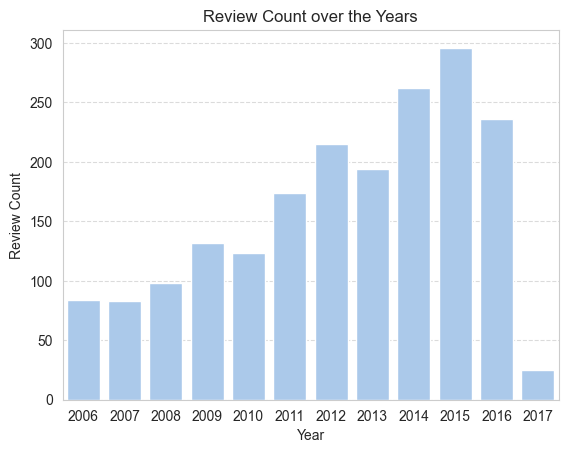

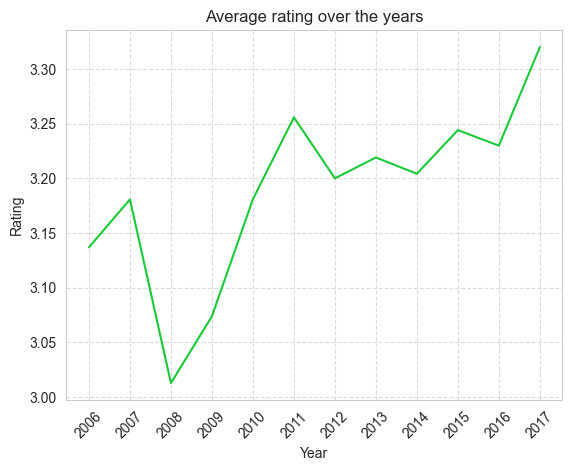

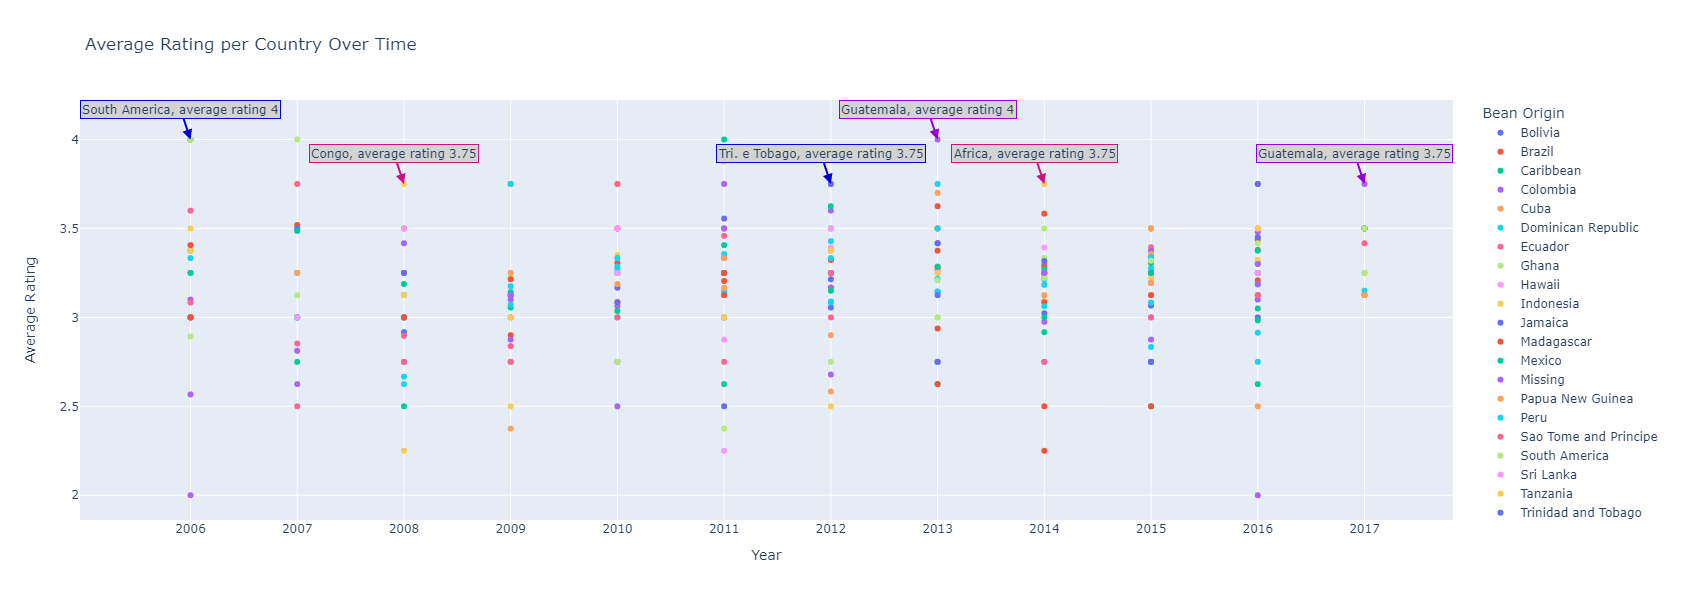

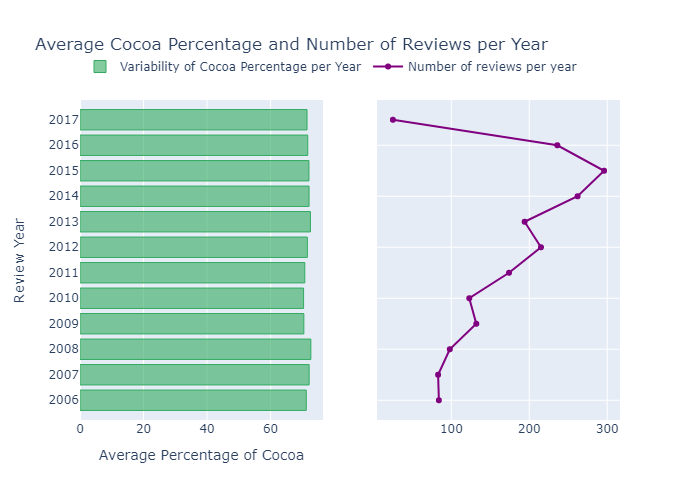

In [16]:
# Now we check the variables against the review date columns (years)

review_counts = ds['Review_Date'].value_counts().reset_index()
unique_years = ds['Review_Date'].unique()
sns.set_color_codes("pastel")
plt.figure()
sns.barplot(data=review_counts, x="Review_Date", y="count", color="b")
plt.xlabel("Year")
plt.ylabel("Review Count")
plt.title("Review Count over the Years")

plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

avg_rating_date = ds.groupby('Review_Date').agg({'Rating':'mean'}).reset_index()

sns.set_color_codes("bright")
plt.figure()
sns.lineplot(data=avg_rating_date, x="Review_Date", y="Rating", color="g")
plt.xlabel("Year")
plt.ylabel("Rating")
plt.xticks(rotation=45, ticks=unique_years)
plt.title("Average rating over the years")

plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.grid(axis='x', linestyle='--', alpha=0.7) 
plt.show()

avg_rating_per_country_per_year = ds.groupby(['Review_Date', 'Broad_Bean_Origin'])['Rating'].mean().reset_index()

fig10 = px.scatter(avg_rating_per_country_per_year, x='Review_Date',
                 y='Rating',
                 color='Broad_Bean_Origin',
                 title='Average Rating per Country Over Time', 
                 labels={'Review_Date': 'Year', 'Rating': 'Average Rating', 'Broad_Bean_Origin': 'Bean Origin'},
                 width=1700, height=600)
fig10.update_layout(xaxis=dict(tickmode='array', tickvals=unique_years))
fig10.add_annotation(x='2013', y='4',
                   text='Guatemala, average rating 4',
                   showarrow=True,
                   arrowhead=2,
                   arrowsize=1,
                   arrowcolor='darkviolet',
                   arrowwidth=2,
                   bordercolor="darkviolet",
                   bgcolor="lightgray")
fig10.add_annotation(x='2017', y='3.75',
                   text='Guatemala, average rating 3.75',
                   showarrow=True,
                   arrowhead=2,
                   arrowsize=1,
                   arrowcolor='darkviolet',
                   arrowwidth=2,
                   bordercolor="darkviolet",
                   bgcolor="lightgray")
fig10.add_annotation(x='2008', y='3.75',
                   text='Congo, average rating 3.75',
                   showarrow=True,
                   arrowhead=2,
                   arrowsize=1,
                   arrowcolor='mediumvioletred',
                   arrowwidth=2,
                   bordercolor="mediumvioletred",
                   bgcolor="lightgray")
fig10.add_annotation(x='2014', y='3.75',
                   text='Africa, average rating 3.75',
                   showarrow=True,
                   arrowhead=2,
                   arrowsize=1,
                   arrowcolor='mediumvioletred',
                   arrowwidth=2,
                   bordercolor="mediumvioletred",
                   bgcolor="lightgray")
fig10.add_annotation(x='2006', y='4',
                   text='South America, average rating 4',
                   showarrow=True,
                   arrowhead=2,
                   arrowsize=1,
                   arrowcolor='mediumblue',
                   arrowwidth=2,
                   bordercolor="mediumblue",
                   bgcolor="lightgray")
fig10.add_annotation(x='2012', y='3.75',
                   text='Tri. e Tobago, average rating 3.75',
                   showarrow=True,
                   arrowhead=2,
                   arrowsize=1,
                   arrowcolor='mediumblue',
                   arrowwidth=2,
                   bordercolor="mediumblue",
                   bgcolor="lightgray")

fig10.show('png')

avg_cocoa_per_year = ds.groupby('Review_Date')['Cocoa_Percent'].mean().reset_index()
unique_years_date = avg_cocoa_per_year['Review_Date'].unique()
review_sorted = review_counts.sort_values(by='Review_Date')

fig11 = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                      shared_yaxes=True, vertical_spacing=0.001)

fig11.append_trace(go.Bar(
    x=avg_cocoa_per_year['Cocoa_Percent'],
    y=avg_cocoa_per_year['Review_Date'],
    marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    ),
    name='Variability of Cocoa Percentage per Year',
    orientation='h'
), 1, 1)

fig11.append_trace(go.Scatter(
    x=review_sorted['count'],
    y=review_sorted['Review_Date'],
    mode='lines+markers',
    line_color='rgb(128, 0, 128)',
    name='Number of reviews per year',
), 1, 2)

fig11.update_layout(xaxis_title="Average Percentage of Cocoa", yaxis_title="Review Year")
fig11.update_layout(yaxis=dict(tickmode='array', tickvals=unique_years_date))
fig11.update_layout(title_text="Average Cocoa Percentage and Number of Reviews per Year",legend=dict(x=0, y=1.15, orientation="h"))

fig11.show('png')

The number of reviews steadily grew, with the exception of a couple of years, before severely declining in 2017. While the average kept increasing.
In regards to the average rating per country over time, we see a repetition of South and Central American as well as African regions with the best averages throughout the years.